# Step 1: Load dataset


In [428]:
import pandas as pd
df = pd.read_csv('data/dataset.csv')

df.head(10)

,income,loan_amount,term,credit_history,defaulted
0,60940.854754,17402.715471,60,1.0,1
1,49511.242579,6664.626123,36,0.0,0
2,63658.393686,17985.281393,60,0.0,1
3,79414.537415,21001.173770,36,1.0,0
4,47785.239255,4037.586145,36,1.0,0
5,NaN,18244.339419,36,1.0,0
6,NaN,23366.013955,60,1.0,1
7,65813.825125,8742.153888,60,1.0,0
8,43549.461053,26035.434321,36,1.0,1
9,61766.080785,18514.114056,60,1.0,0


# Step 2: Understand the data type and the shape of the dataset

In [429]:
df.shape

(1248, 5)

In [430]:
df.columns.to_list()

['income', 'loan_amount', 'term', 'credit_history', 'defaulted']

In [431]:
df.dtypes

income            float64
loan_amount       float64
term                int64
credit_history    float64
defaulted           int64
dtype: object

# Step 3: Preprocessing data
1. Check for missing values


In [432]:
df.isnull().sum()

income            120
loan_amount       122
term                0
credit_history    112
defaulted           0
dtype: int64

2. Mean or Median imputation

In [433]:
df.fillna({'income': df['income'].median()}, inplace=True)
df.fillna({'loan_amount': df['loan_amount'].median()}, inplace=True)
df.fillna({'credit_history': df['credit_history'].mode()[0]}, inplace=True)

- Verify missing values are handled


In [434]:
df.isnull().sum()

income            0
loan_amount       0
term              0
credit_history    0
defaulted         0
dtype: int64

3. Summary statistics

In [435]:
df.describe()

,income,loan_amount,term,credit_history,defaulted
count,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000
mean,52500.945298,16167.787505,48.000000,0.771635,0.414263
std,16967.161028,5541.521139,12.004811,0.419948,0.492792
min,8000.000000,1000.000000,36.000000,0.000000,0.000000
25%,41673.912889,12772.722413,36.000000,1.000000,0.000000
50%,52462.564119,16052.247335,48.000000,1.000000,0.000000
75%,62987.634437,19610.211517,60.000000,1.000000,1.000000
max,121349.166832,35158.645407,60.000000,1.000000,1.000000


# Step 4: Data Visualization
1. Distribution of Numberical Features

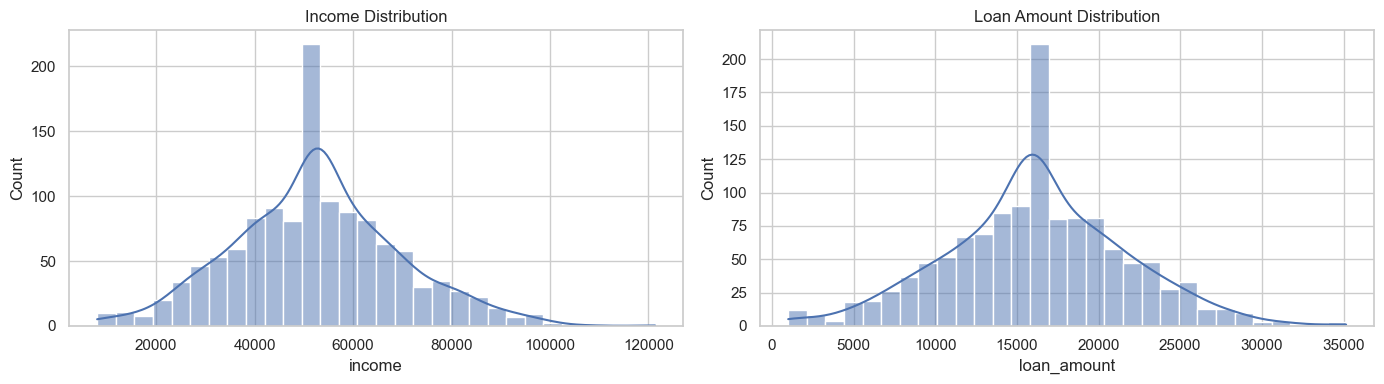

In [436]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style='whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

sns.histplot(df['income'], kde=True, bins=30, ax=axes[0])
axes[0].set_title('Income Distribution')

sns.histplot(df['loan_amount'], kde=True, bins=30, ax=axes[1])
axes[1].set_title('Loan Amount Distribution')

plt.tight_layout()
plt.show()

2. Loan Term Count Plot

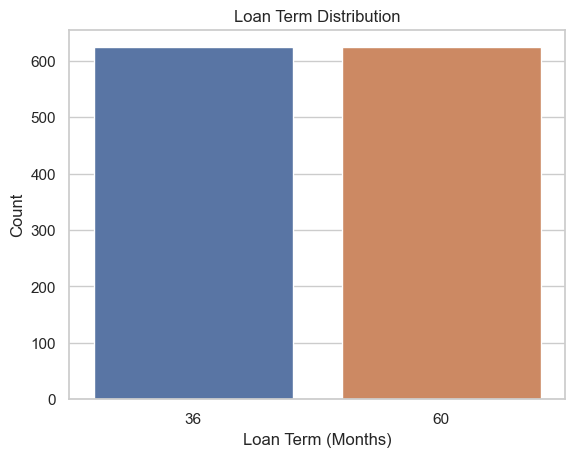

In [437]:
sns.countplot(x='term', data=df)
plt.title('Loan Term Distribution')
plt.xlabel('Loan Term (Months)')
plt.ylabel('Count')
plt.show()

3. Credit History vs Defaulted

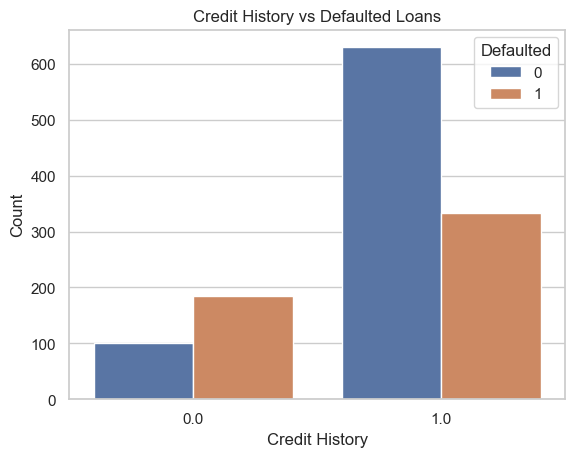

In [438]:
sns.countplot(x='credit_history', hue='defaulted', data=df)
plt.title('Credit History vs Defaulted Loans')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.legend(title='Defaulted')
plt.show()

4. Correlation Heatmap

Text(0.5, 1.0, 'Feature Correlation Heatmap')

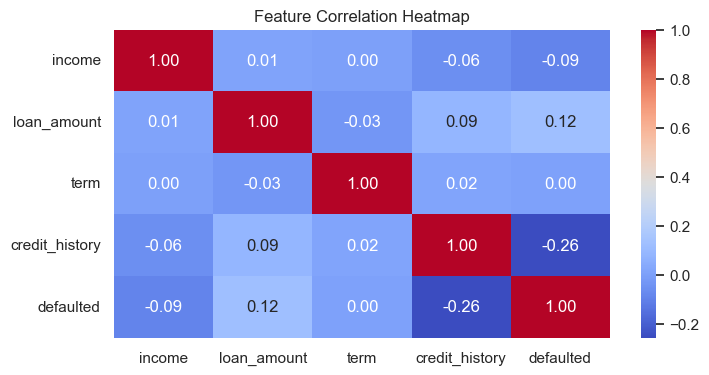

In [439]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')

# Step 5: Feature Engineering
1. Convert Categorical Features

In [440]:
# 36 - 0 and 60 - 1
df['term binary'] = df['term'].apply(lambda x:1 if x == 60 else 0)

2. Create Derived Features

In [441]:
import numpy as np
df['log_income'] = np.log1p(df['income'])
df['log_loan_amount'] = np.log1p(df['loan_amount'])

3. Feature Selection

In [442]:
features = ['log_income', 'log_loan_amount', 'credit_history']
target = 'defaulted'

# Step 6: Model Training
1. Feature Scaling
- use StandardScalar from sklearn

In [443]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scale_features = ['log_income', 'log_loan_amount']

df[scale_features] = scalar.fit_transform(df[scale_features])   
df.head()

,income,loan_amount,term,credit_history,defaulted,term binary,log_income,log_loan_amount
0,60940.854754,17402.715471,60,1.0,1,1,0.555865,0.335135
1,49511.242579,6664.626123,36,0.0,0,0,0.010029,-1.753786
2,63658.393686,17985.281393,60,0.0,1,1,0.670515,0.406800
3,79414.537415,21001.173770,36,1.0,0,0,1.251689,0.744209
4,47785.239255,4037.586145,36,1.0,0,0,-0.083218,-2.844410


2. Train Test Split
- use an 80-20 split for training and 20% for testing using Scikit-learn's train_test_split function

In [444]:
from sklearn.model_selection import train_test_split    
X = df[features]    
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)



3. Build Model Pipeline

To build and evaluate our credit scoring model, used three different classification algorithms:
- Logistic Regression for its interpretability and baseline performance

- Decision Tree Classifier for its ability to capture non-linear relationships

- Random Forest Classifier for robustness and improved generalization

Used Scikit-learn's Pipeline to streamline model creation, training, and prediction. This ensures the workflow remains clean and modular.


In [445]:
# Import required libraries and classes from sklearn
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [446]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)  
}

In [447]:
for name, model in models.items():
    print(f"\nModel: {name}")
    pipeline = Pipeline([
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    print(f"Accuracy:{accuracy_score(y_test, y_pred):.4f}")
    print(f"Classification Report:")
    print(classification_report(y_test, y_pred))


Model: Logistic Regression
Accuracy:0.6520
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.86      0.74       143
           1       0.67      0.37      0.48       107

    accuracy                           0.65       250
   macro avg       0.66      0.62      0.61       250
weighted avg       0.66      0.65      0.63       250


Model: Decision Tree
Accuracy:0.5400
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.62      0.60       143
           1       0.46      0.44      0.45       107

    accuracy                           0.54       250
   macro avg       0.53      0.53      0.53       250
weighted avg       0.54      0.54      0.54       250


Model: Random Forest
Accuracy:0.6080
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.72      0.68       143
           1       0.55      0.46      0.50     